**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

**2. Load Libraries**

In [3]:
try:
    df_processed = pd.read_csv('../data/processed_loan_data.csv')
    print(f"Processed data loaded. Shape: {df_processed.shape}")
except FileNotFoundError:
    print("Error: processed_loan_data.csv not found. Please run the preprocessing notebook first")
    df_processed = None

Processed data loaded. Shape: (565165, 53)


**3. Calculate Overall Default Rate**

Overall Default Rate: 75.72%


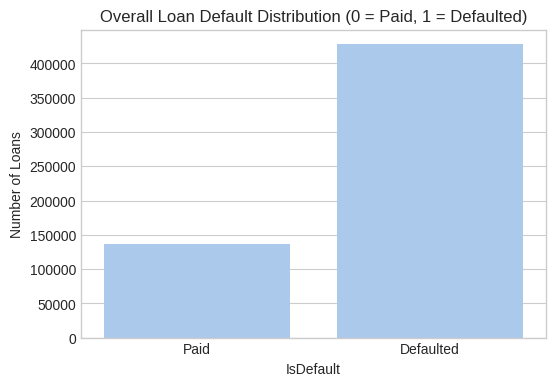

In [5]:
if df_processed is not None:
    default_rate = df_processed['IsDefault'].mean()
    print(f"Overall Default Rate: {default_rate:.2%}")
    
    #Bar chart for default rate
    plt.figure(figsize=(6, 4))
    sns.countplot(x='IsDefault', data=df_processed)
    plt.title('Overall Loan Default Distribution (0 = Paid, 1 = Defaulted)')
    plt.xticks(ticks=[0, 1], labels=['Paid', 'Defaulted'])
    plt.ylabel('Number of Loans')
    plt.show()
 

**4. Univariate Analysis (Numerical Features Against Default Status)**

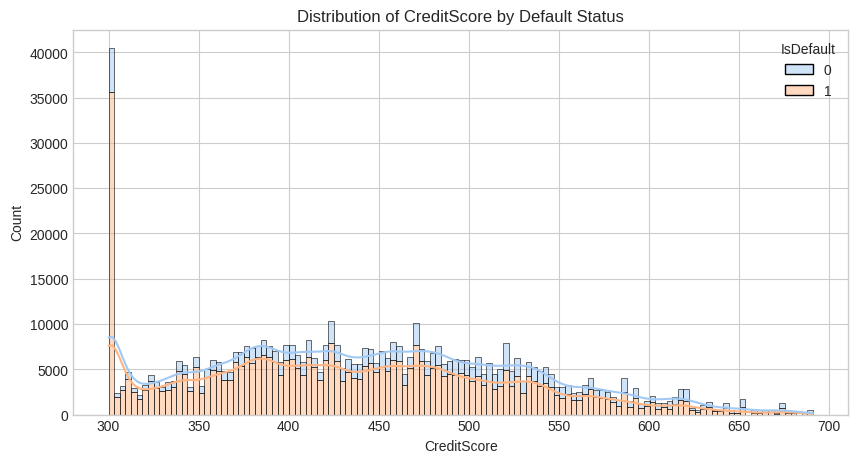

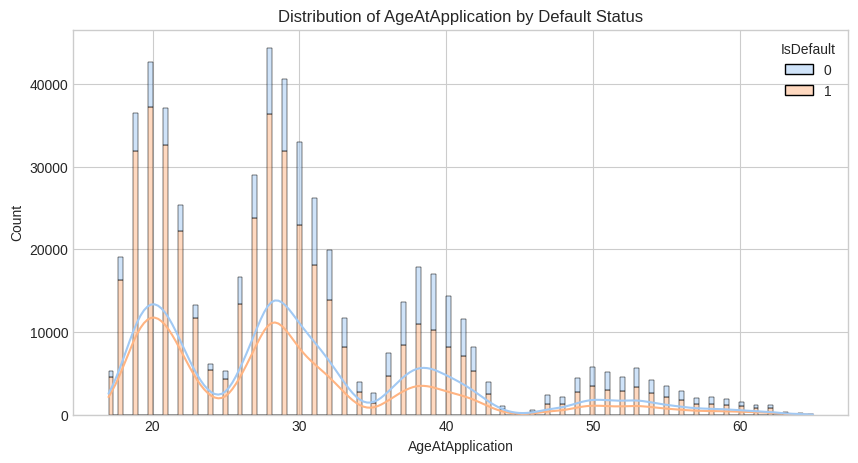

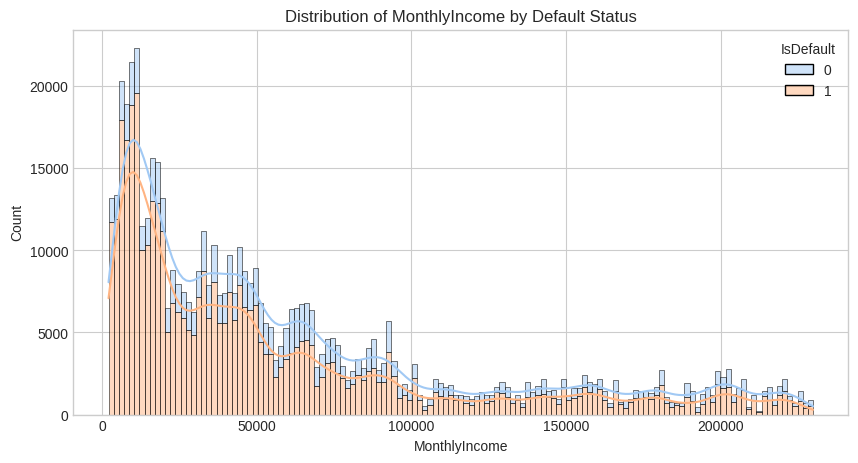

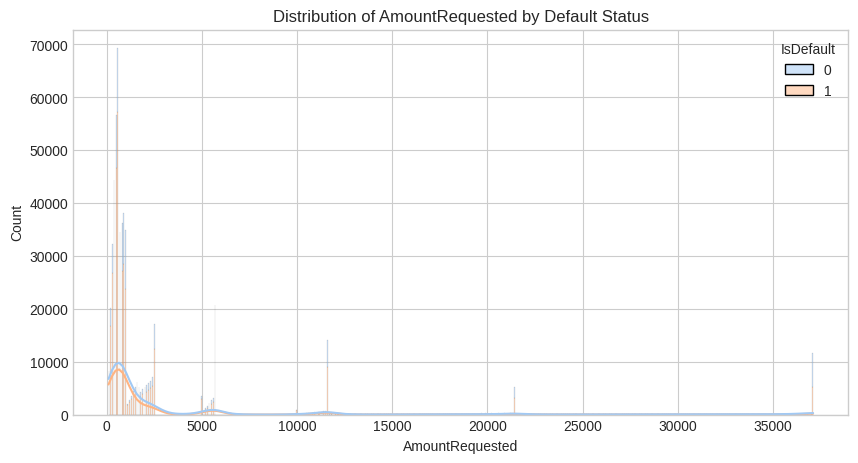

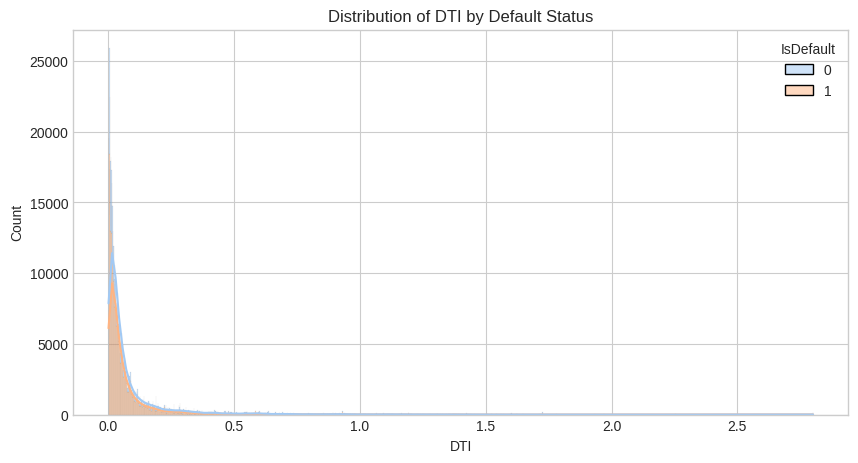

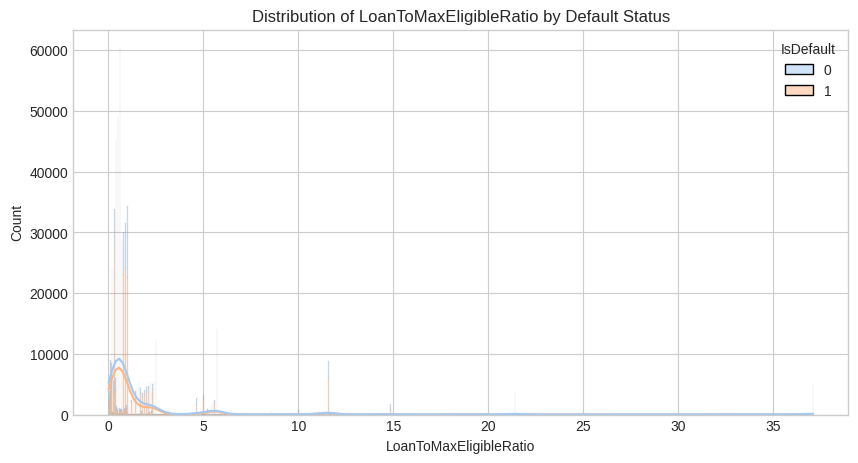

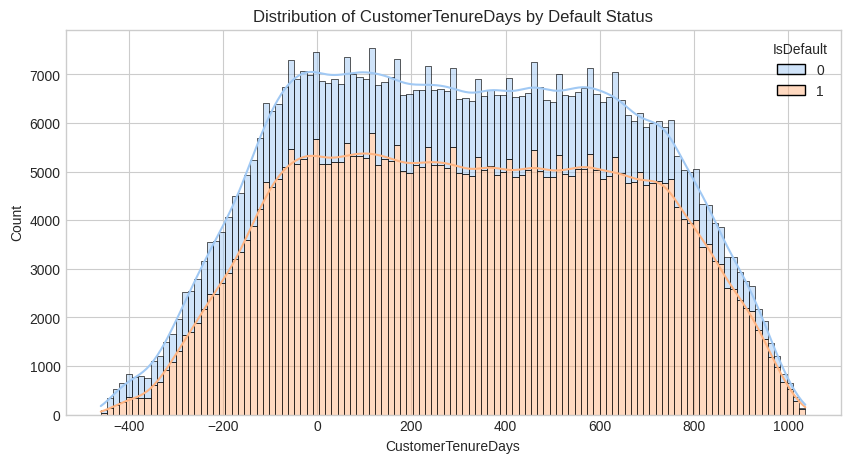

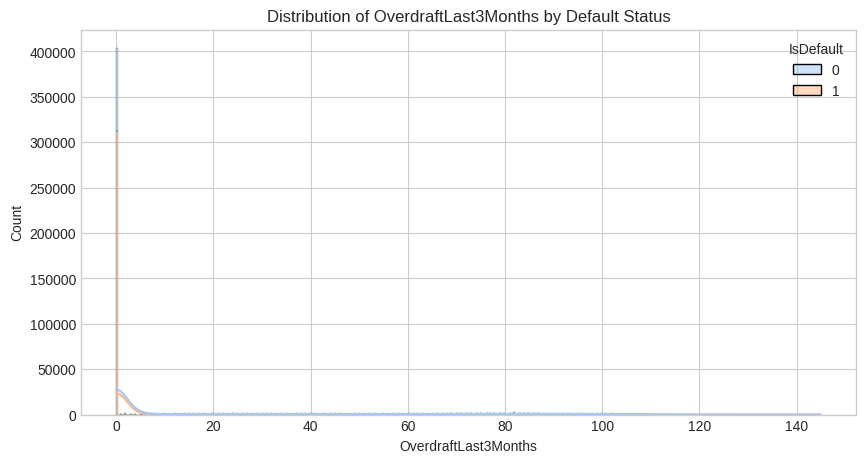

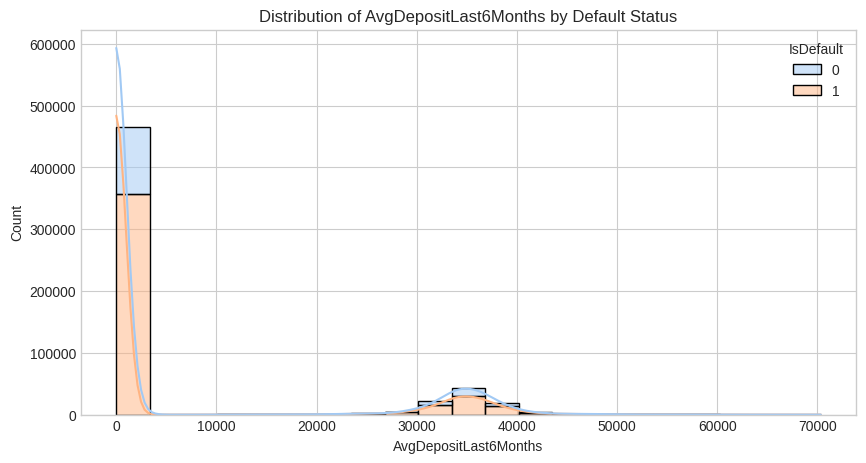

In [11]:
if df_processed is not None:
    numerical_features = ['CreditScore', 'AgeAtApplication', 'MonthlyIncome', 'AmountRequested', 'DTI', 
                          'LoanToMaxEligibleRatio', 'CustomerTenureDays', 'OverdraftLast3Months', 'AvgDepositLast6Months']
    for col in numerical_features:
        if col in df_processed.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(data=df_processed, x=col, hue='IsDefault', kde=True, multiple="stack")
            plt.title(f'Distribution of {col} by Default Status')
            plt.show()
        else:
            print(f"Warning: Column {col} not found in Dataframe.")

Construct Boxplots for univariate analysis

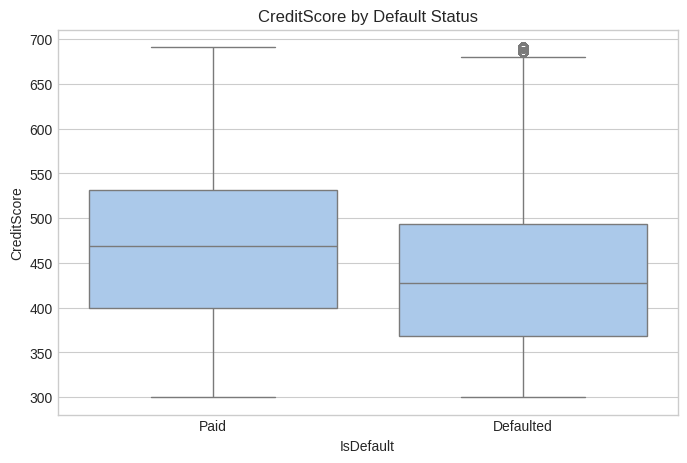

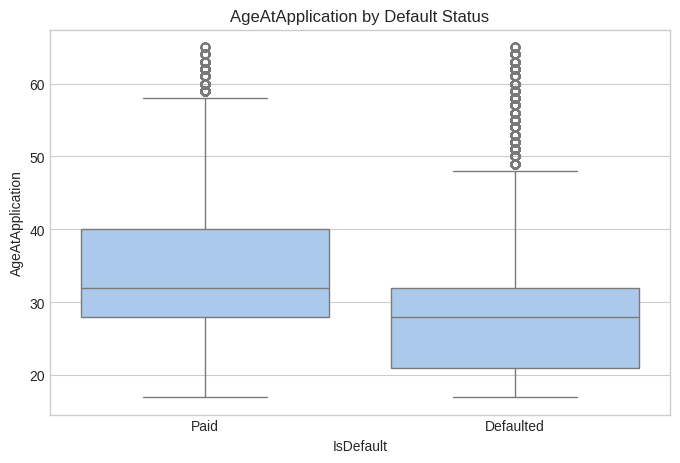

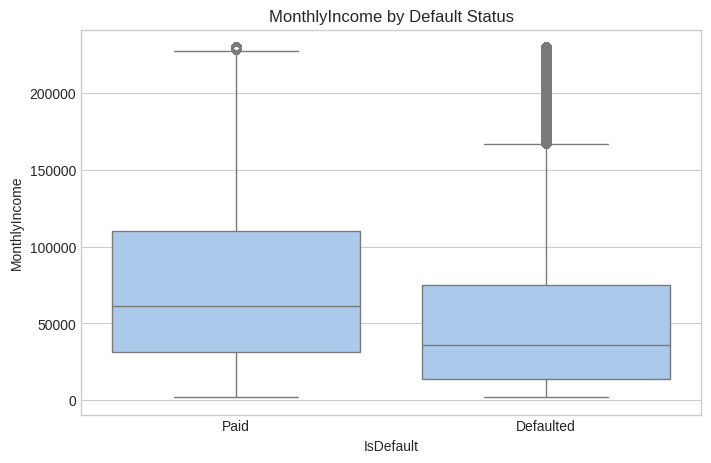

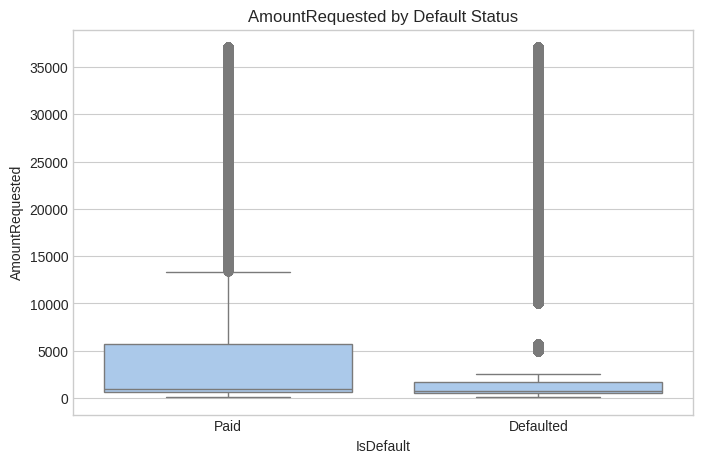

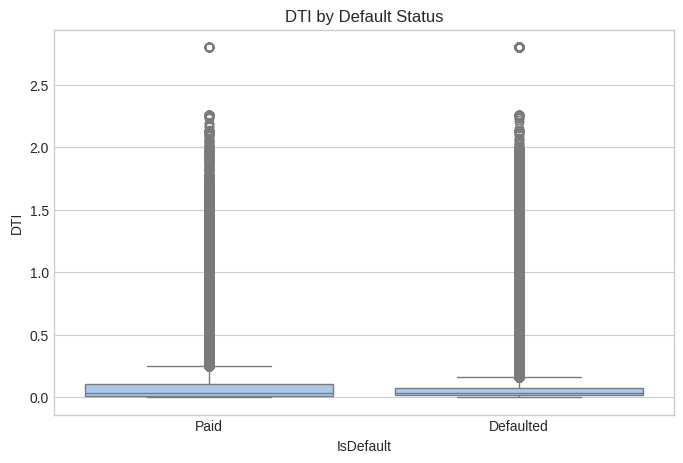

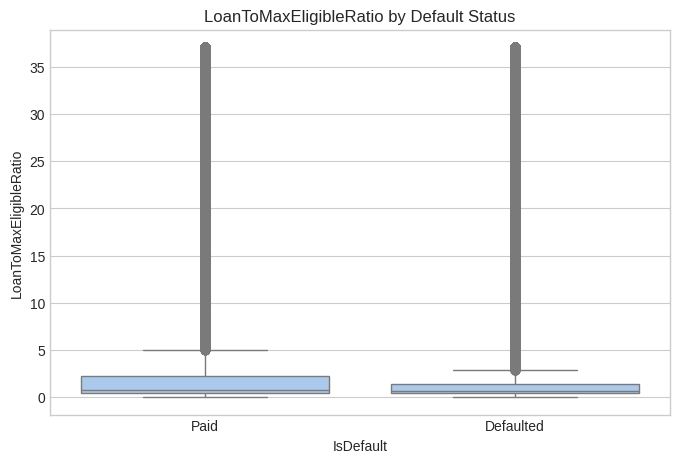

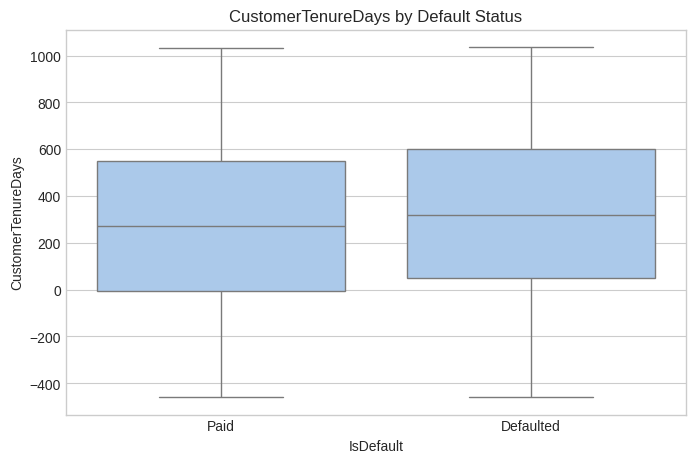

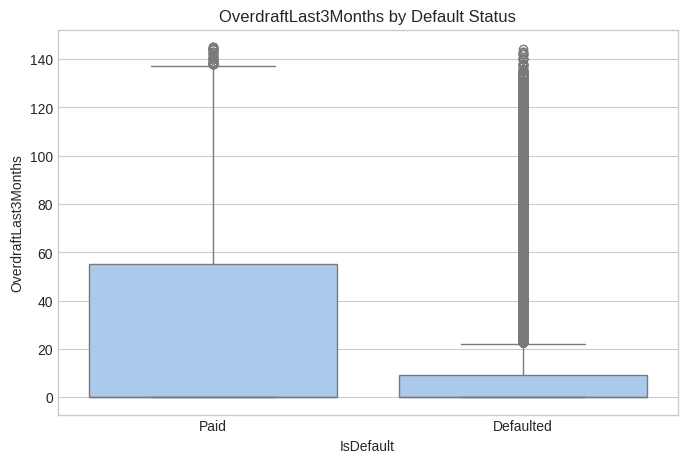

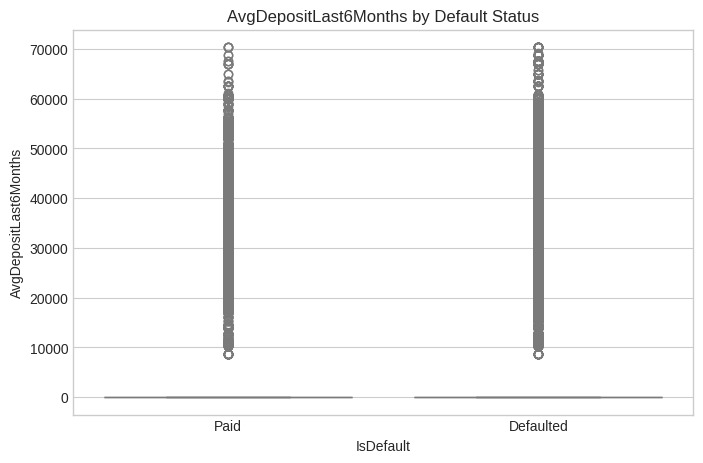

In [10]:
if df_processed is not None:
    for col in numerical_features:
        if col in df_processed.columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x='IsDefault', y=col, data=df_processed)
            plt.title(f'{col} by Default Status')
            plt.xticks(ticks=[0, 1], labels=['Paid', 'Defaulted'])
            plt.show()
        else:
            print(f"Warning: Column {col} not found in Dataframe.")

**5. Bivariate Analysis (Categorical Features Against Default Rate)**

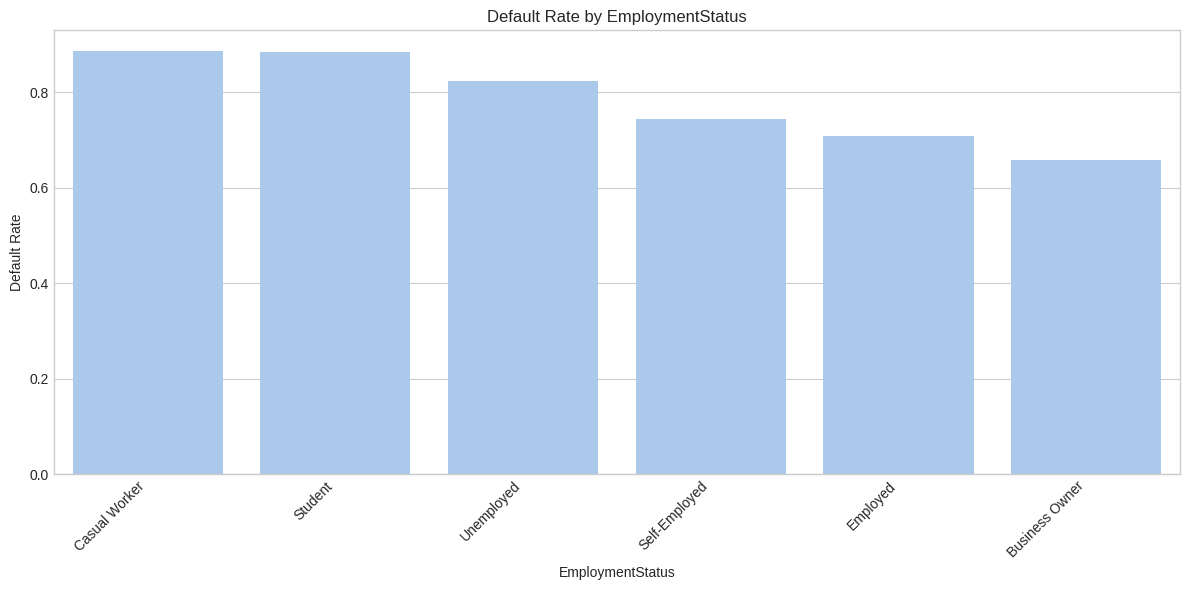

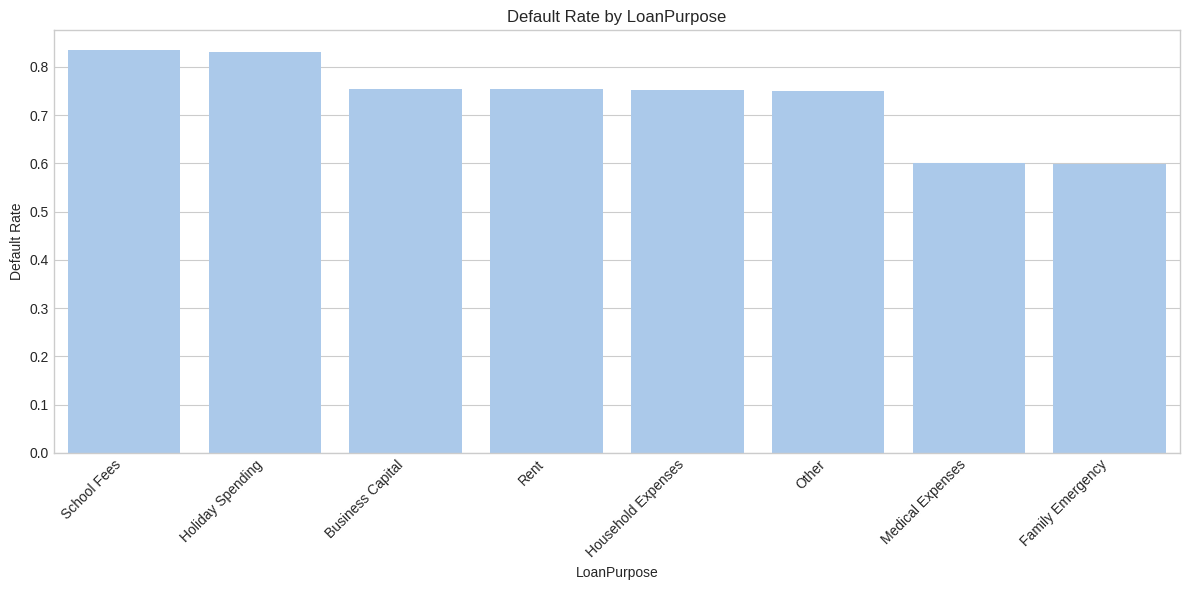

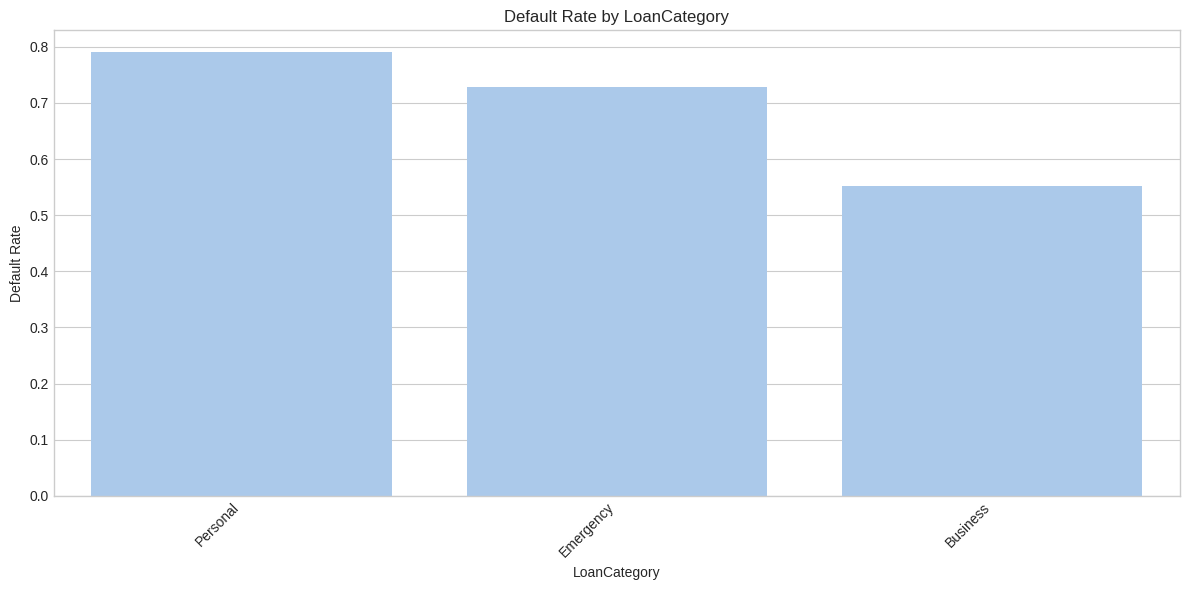

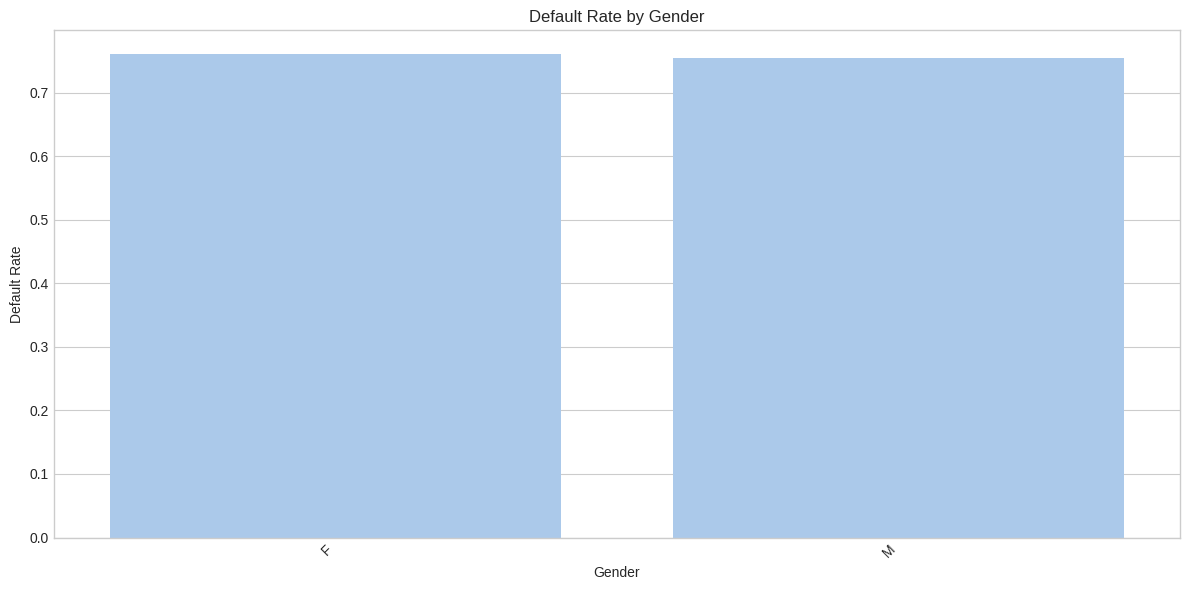

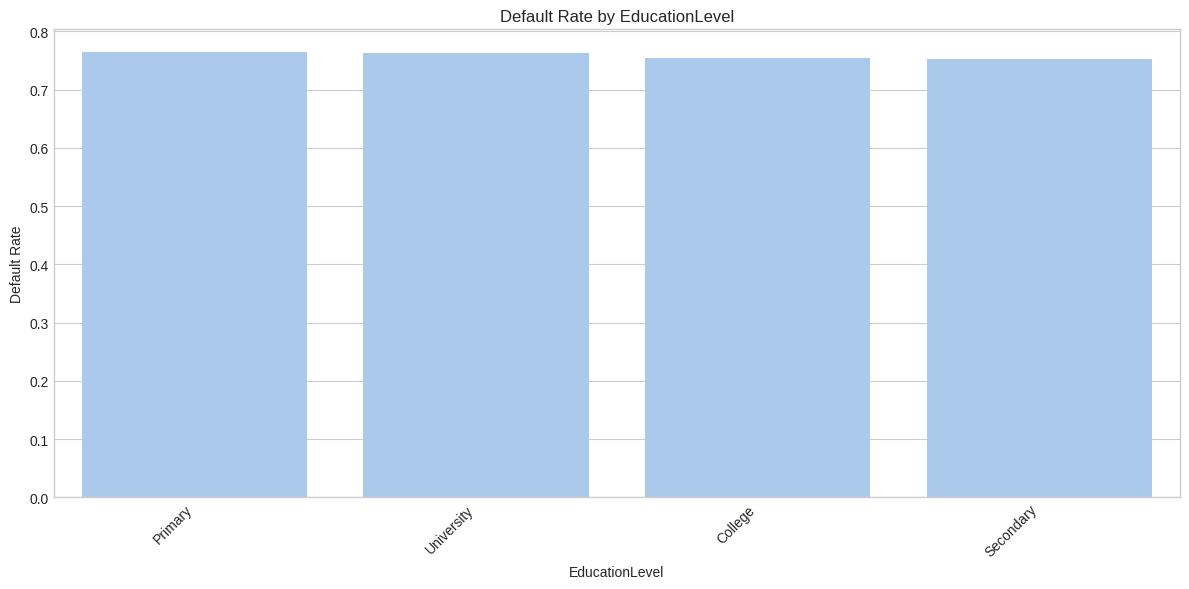

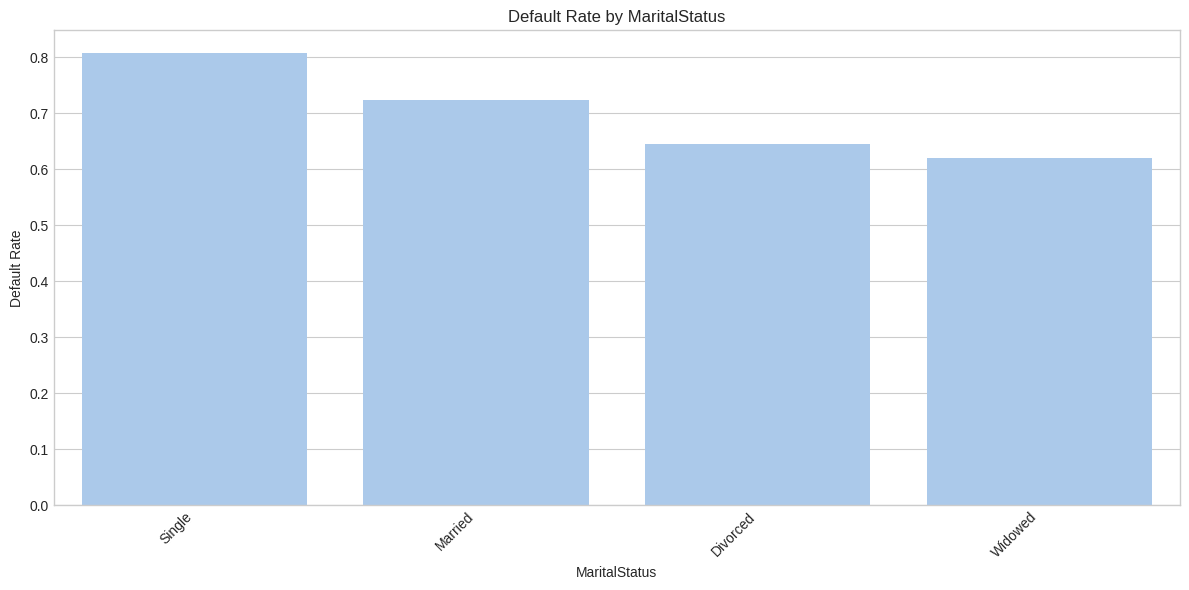

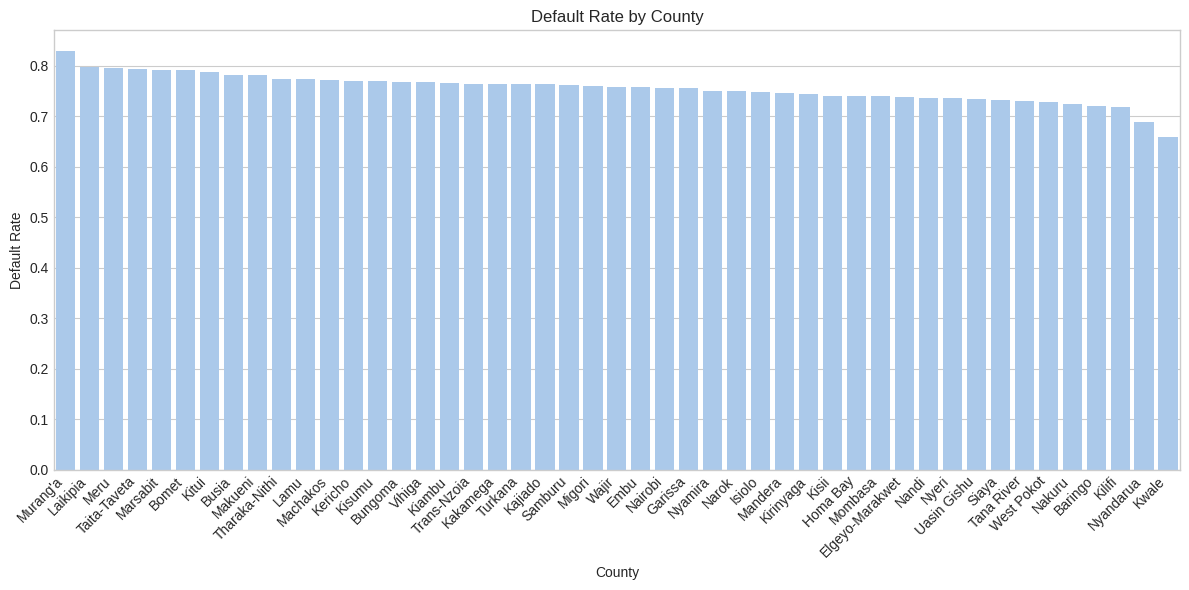

In [9]:
if df_processed is not None:
    categorical_features = ['EmploymentStatus', 'LoanPurpose', 'LoanCategory', 'Gender', 'EducationLevel', 'MaritalStatus', 'County'] 
    for col in categorical_features:
        if col in df_processed.columns:
            plt.figure(figsize=(12, 6))
            #Calculate default rate per category
            default_rate_by_cat = df_processed.groupby(col)['IsDefault'].mean().sort_values(ascending=False)
            sns.barplot(x=default_rate_by_cat.index, y=default_rate_by_cat.values)
            plt.title(f'Default Rate by {col}')
            plt.ylabel('Default Rate')
            plt.xlabel(col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Warning: Column {col} not found in Dataframe. ")
